# Thermal Murnaghan EOS for Code Generator 
Required system packages and initialization

In [10]:
# %run 'init-coder-model.ipynb'

#### (2) $V$ (EOS) integrals
Next, define a volume-explicit equation of state applicable over the whole of temperature and pressure space

Let's use a temp-dependent Murnaghan EOS (which is invertible for V(P, T))

In [11]:

VTrPr,a0,K0,K_P,K_P2 = sym.symbols('V_TrPr a0 K0 K_P K_P2')
a_v,b_v,c_v = sym.symbols('a_v b_v c_v')

Pth = sym.symbols('P_th')
# V_T, K_T, dK_T, dK_P = sym.symbols("V_T K_T K'_T K'_P")
# dK_P 

In [12]:
V0T,K0T = sym.symbols('V_0T K_0T')

In [13]:
# V = V0T*( 1 - a_v*(1-(1+b_v*P)**(-c_v)) )
# V

In [14]:
# V = V0T*( 1 - sym.sqrt((1+c_v)/c_v)*(1-(1+b_v*P)**(-c_v)) )
# V

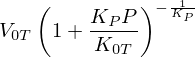

In [15]:
V = V0T*( 1 + K_P/K0T*P)**(-1/K_P)
V

Integrate VdP to get energetic contribution:

G(T,P) - G(T, Pr)

In [16]:
# V = VTrPr*( 1 + K_P/K0*P)**(-1/K_P)
# V

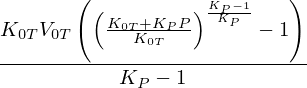

In [17]:
VdP = sym.integrate(V, (P, 0, P), conds='none')
VdP = VdP.simplify()

# VdP = VdP.subs(a_v, (1+K_P)/(1+K_P+K0T*K_P2))
VdP

In [18]:
# # V = V.subs(a_v, (1+K_P)/(1+K_P+K0T*K_P2))
# V = V.subs(b_v, K_P/K0T - K_P2/(1+K_P))
# V = V.subs(c_v, (1+K_P+K0T*K_P2)/(K_P**2 +K_P - K0T*K_P2))
# V = V.subs(K_P2, -K_P/K0)
# V

In [19]:
# VdP = sym.integrate(V, (P, 0, P), conds='none')
# VdP = VdP.simplify()
# 
# # VdP = VdP.subs(a_v, (1+K_P)/(1+K_P+K0T*K_P2))
# VdP = VdP.subs(b_v, K_P/K0T - K_P2/(1+K_P))
# VdP = VdP.subs(c_v, (1+K_P+K0T*K_P2)/(K_P**2 +K_P - K0T*K_P2))
# VdP = VdP.subs(K_P2, -K_P/K0)
# VdP.simplify()

# Simple linear Thermal expansion model for volume
* use Anderson-Gruneisen approach to approximate thermal softening

In [20]:
alpha0 = sym.symbols('alpha0')

V0T_expr = VTrPr*(1+alpha0*(T-Tr))
V0T_expr

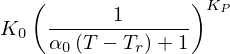

In [21]:
K0T_expr = K0*(VTrPr/V0T_expr)**K_P
K0T_expr

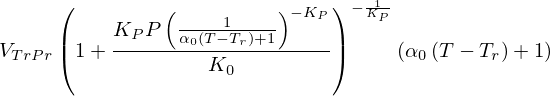

In [22]:
V = V.subs(V0T, V0T_expr)
V = V.subs(K0T, K0T_expr)
V

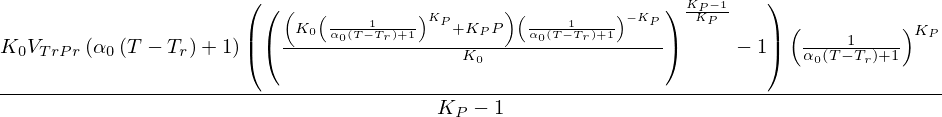

In [23]:
VdP = VdP.subs(V0T, V0T_expr)
VdP = VdP.subs(K0T, K0T_expr)
VdP.simplify()

In [24]:
VdP.free_symbols

# Store results in model

In [26]:
# params= [('V_TrPr', 'J/bar-m', VTrPr), ('a0','1/K',a0),  ('K0','bar',K0), ('dKdT','1/K',dK_T)]
params= [('V_TrPr', 'J/bar-m', VTrPr), 
         ('alpha0','1/K',alpha0),  ('K0','bar',K0),  ('K_P','',K_P)]

In [27]:
model.add_expression_to_model(VdP, params)